In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender']) # Male = 1, Fem = 0
data['Partner'] = le.fit_transform(data['Partner']) #Yes = 1
data['Dependents'] = le.fit_transform(data['Dependents']) # Yes = 1
data['PhoneService'] = le.fit_transform(data['PhoneService'])
data['PaperlessBilling'] = le.fit_transform(data['PaperlessBilling'])
data['Churn'] = le.fit_transform(data['Churn'])

# One hot Encoding remaining variables
data = pd.get_dummies(data, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup','DeviceProtection', 'TechSupport',
                                 'Contract', 'PaymentMethod','StreamingMovies', 'StreamingTV'], drop_first=False)

# convert true false into 1, 0
data = data.apply(lambda x: x.astype(int) if x.dtypes == 'bool' else x) # convert booleans to 1 and 0

# Drop Unnecessary Columns
data = data.drop(columns = ['customerID'])

#check dataframe
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
# converting non-numeric to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# check that all is numeric
print(data.dtypes)

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet service           int64
OnlineSecurity_Yes                           int64
OnlineBackup_No                

In [ ]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,11
Churn,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.7867803837953091

In [ ]:
model.score(X_train,y_train)

0.8088888888888889

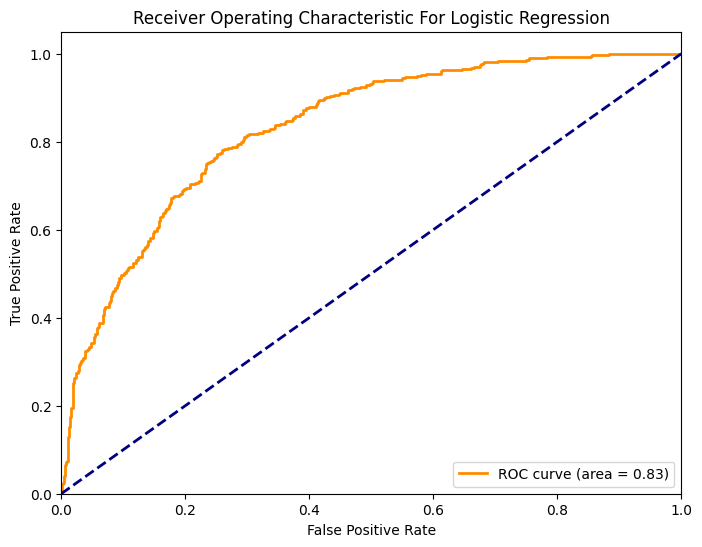

In [ ]:
# prompt: give me roc auc curver for Logistic Regression

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic For Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


np.random.seed(123) # for reproducibility

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2', 'l2'],
             'solver':['lbfgs']}

lr = LogisticRegression(max_iter=1000)
logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters).fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("CV accuracy :",logreg_cv.best_score_)

# extracting the best model
best_logreg = logreg_cv.best_estimator_

# predict on the test set
y_pred = best_logreg.predict(X_test)

# obtaining performance metrics
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

# classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
CV accuracy : 0.8040922106407591
Test accuracy: 0.7868
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[914 119]
 [181 193]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization


In [ ]:
# model = Sequential()
# model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.3))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test),
          callbacks=[lr_scheduler, early_stopping])


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5862 - loss: 0.7936 - val_accuracy: 0.7726 - val_loss: 0.5044 - learning_rate: 0.0010
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7109 - loss: 0.5831 - val_accuracy: 0.7861 - val_loss: 0.4620 - learning_rate: 0.0010
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7475 - loss: 0.5250 - val_accuracy: 0.7697 - val_loss: 0.4612 - learning_rate: 0.0010
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7695 - loss: 0.4989 - val_accuracy: 0.7754 - val_loss: 0.4514 - learning_rate: 0.0010
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7751 - loss: 0.4769 - val_accuracy: 0.7704 - val_loss: 0.4544 - learning_rate: 0.0010
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7731 - loss: 0.4714 - val_accuracy: 0.7640 - val_loss: 0.4602 - learning_rate: 0.0010
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7728 - loss: 0.4576 - val_ac

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,589 (920.27 KB)

 Trainable params: 78,145 (305.25 KB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 156,292 (610.52 KB)

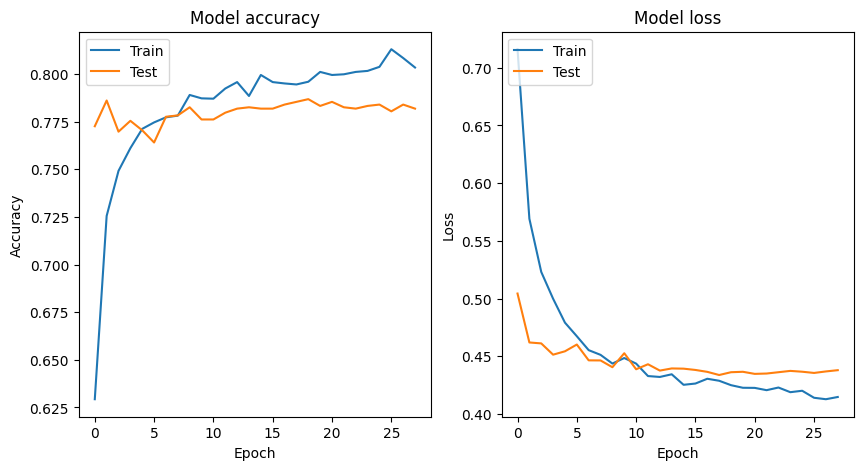

In [ ]:
# prompt: plot the accuracy and loss

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


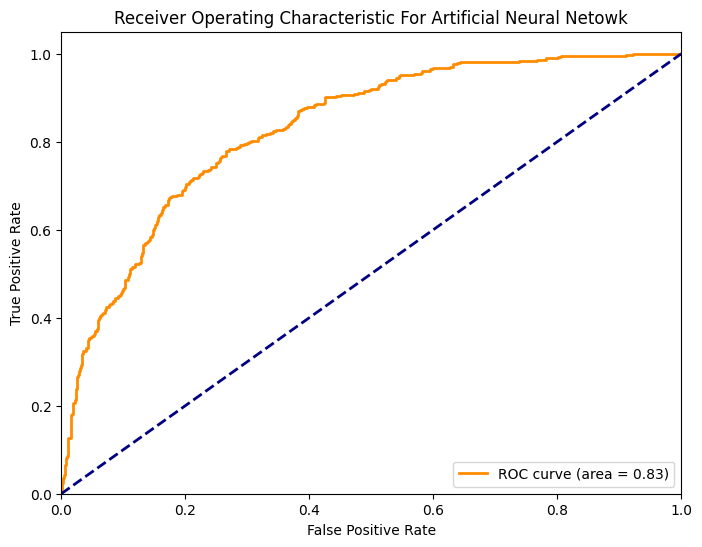

AUC: 0.830005539133721


In [ ]:
# prompt: code of ROC and AUC for neural network

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic For Artificial Neural Netowk')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split


# Model 1
input1 = Input(shape=(X_train.shape[1],))
x1 = Dense(64, activation='relu')(input1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)
output1 = Dense(64, activation='relu')(x1)

# Model 2
input2 = Input(shape=(X_train.shape[1],))
x2 = Dense(128, activation='relu')(input2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.4)(x2)
output2 = Dense(64, activation='relu')(x2)

# Combining Models
combined = Concatenate()([output1, output2])
x = Dense(128, activation='relu')(combined)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
final_output = Dense(1, activation='sigmoid')(x)

# Final Model
model = Model(inputs=[input1, input2], outputs=final_output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=50, validation_data=([X_test, X_test], y_test))


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6996 - loss: 0.5935 - val_accuracy: 0.7861 - val_loss: 0.4554
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7751 - loss: 0.4815 - val_accuracy: 0.7775 - val_loss: 0.4549
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7805 - loss: 0.4557 - val_accuracy: 0.7747 - val_loss: 0.4673
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7903 - loss: 0.4404 - val_accuracy: 0.7740 - val_loss: 0.4524
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7953 - loss: 0.4337 - val_accuracy: 0.7811 - val_loss: 0.4453
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7865 - loss: 0.4472 - val_accuracy: 0.7839 - val_loss: 0.4431
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8031 - loss: 0.4183 - val_accuracy: 0.7839 - val_loss: 0.4408
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8018 - loss: 0.4282 - val_accuracy: 0.

In [ ]:
# prompt: i want to see summary of the Multi Input ANN

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

# ... (Your existing code for data preprocessing) ...

# Final Model (Multi-Input ANN)
input1 = Input(shape=(X_train.shape[1],))
x1 = Dense(64, activation='relu')(input1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)
output1 = Dense(64, activation='relu')(x1)

input2 = Input(shape=(X_train.shape[1],))
x2 = Dense(128, activation='relu')(input2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.4)(x2)
output2 = Dense(64, activation='relu')(x2)

combined = Concatenate()([output1, output2])
x = Dense(128, activation='relu')(combined)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
final_output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input1, input2], outputs=final_output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=50, validation_data=([X_test, X_test], y_test))

model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 40)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_6             │ (None, 40)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 64)             │          2,624 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 128)            │          5,248 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 64)             │            256 │ dense_23[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 128)            │            512 │ dense_26[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_16 (Dropout)      │ (None, 64)             │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 128)            │          8,320 │ dropout_16[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 64)             │          8,256 │ dropout_18[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 128)            │            512 │ dense_24[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 64)             │            256 │ dense_27[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 64)             │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 64)             │          8,256 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 64)             │          4,160 │ dropout_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2        

 Total params: 63,233 (247.00 KB)

 Trainable params: 62,465 (244.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
random = RandomForestClassifier(n_estimators=100, random_state=42)
random.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
random.score(X_test, y_test)*100

78.82018479033405

In [ ]:
random.score(X_train, y_train)*100

99.76888888888888

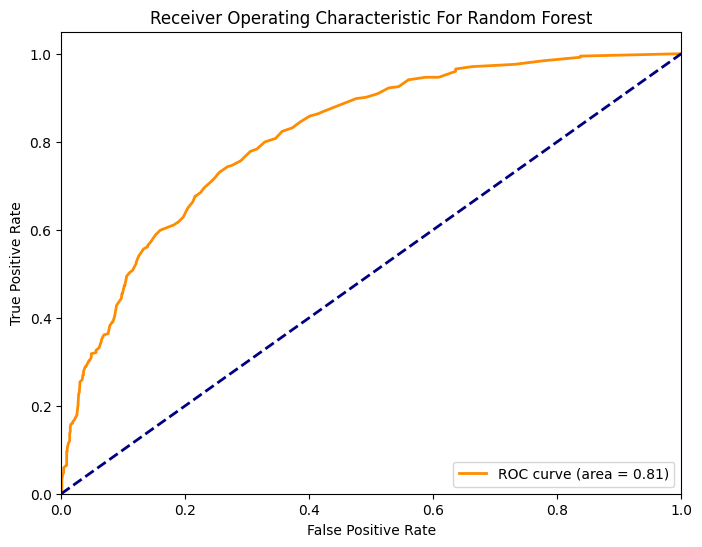

In [ ]:
# prompt: give me code for roc curve for random forest

# Predict probabilities for the test set
y_pred_prob = random.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic For Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

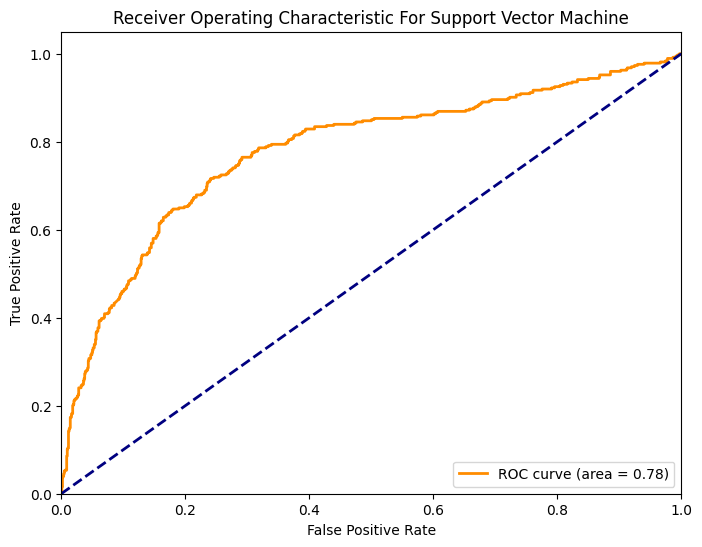

In [ ]:
# prompt: give me roc for Support Vector Machine

from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svm = SVC(kernel='rbf', probability=True) #probability=True is crucial for predict_proba
svm.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic For Support Vector Machine')
plt.legend(loc="lower right")
plt.show()

In [ ]:
svm.score(X_test, y_test)*100
# svm.score(X_train, y_train)*100

78.1094527363184

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='/content/Screenshot 2024-12-17 at 2.17.01 AM.png', show_shapes=True, show_layer_names=True)


AttributeError: 'LogisticRegression' object has no attribute 'built'

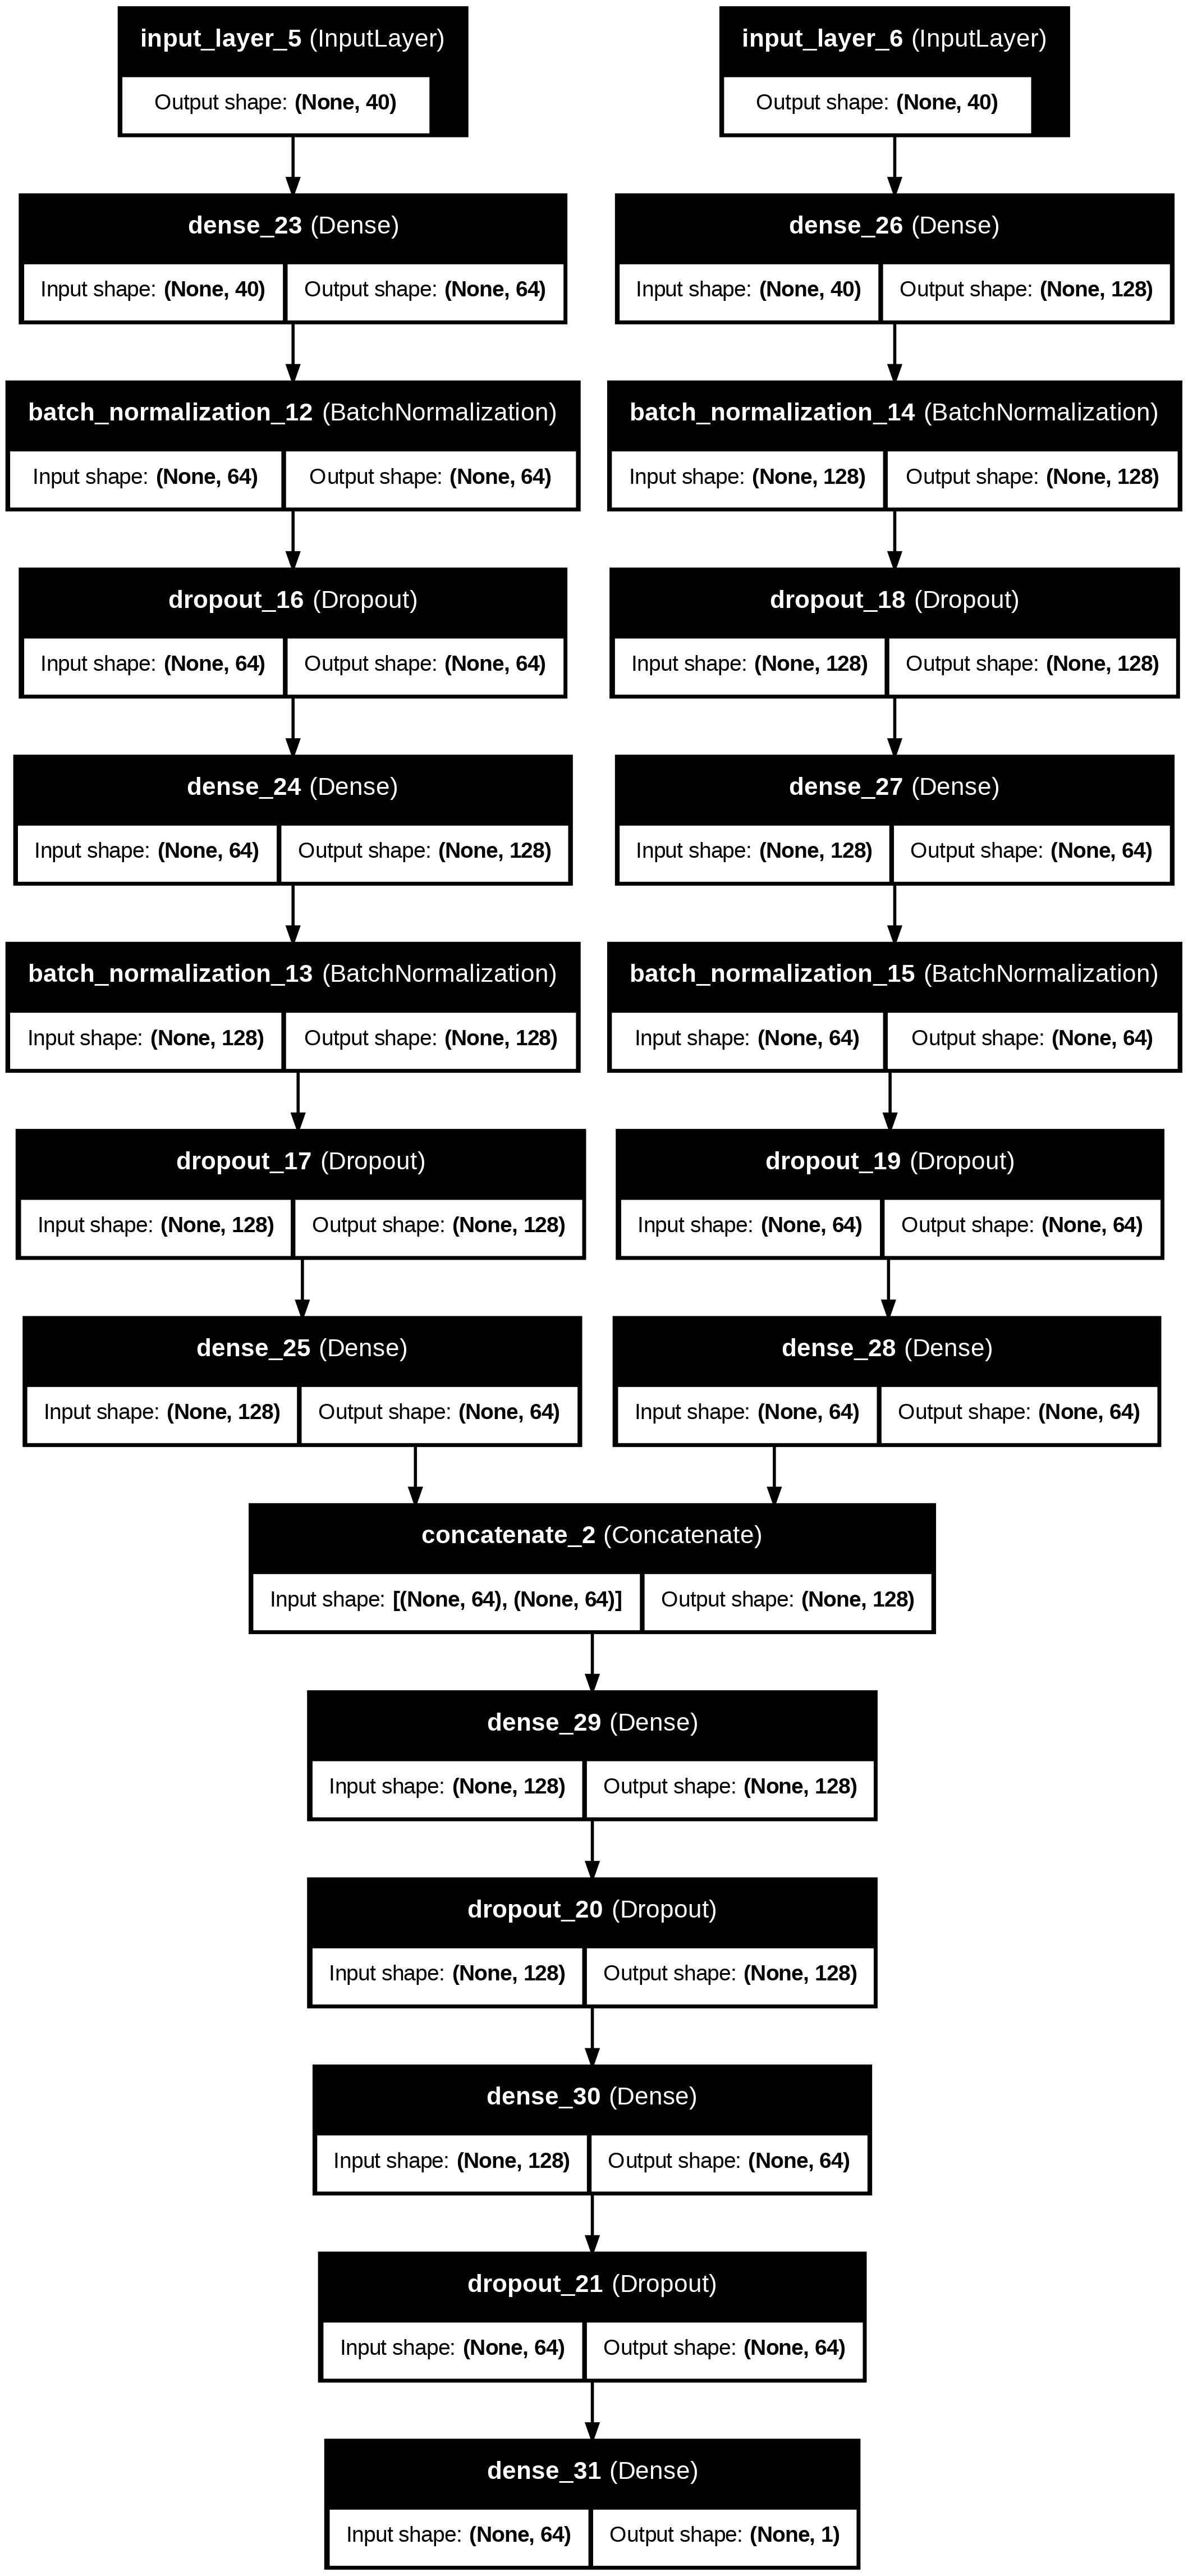

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='/content/Screenshot 2024-12-17 at 2.59.09 AM.png', show_shapes=True, show_layer_names=True)